In [3]:
cd ../..

C:\Users\mrefoyo\Documents\Proyectos\Sub-SpaCE_plus


In [1]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset

print(tf.__version__)

2.13.0


In [2]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = ["BasicMotions", "NATOPS", "UWaveGestureLibrary"]
methods = ["subspace_iknn_gch", "subspace_iknn_ich", "subspace_gknn_gch", "subspace_gknn_ich"]
counterfactual_methods = [f"{method}.pickle" for method in methods]

# Get results

In [4]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculator, possible_nuns, desired_classes = load_dataset_for_eval(dataset)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculator
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset = calculate_metrics_for_dataset(
        dataset, counterfactual_methods,
        data_tuple, original_classes, model, outlier_calculator, possible_nuns
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
subspace_gknn_gch.pickle


100%|██████████| 40/40 [00:01<00:00, 20.81it/s]


subspace_gknn_ich.pickle


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


subspace_iknn_gch.pickle


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


subspace_iknn_ich.pickle


100%|██████████| 40/40 [00:01<00:00, 20.81it/s]


Calculating metrics for NATOPS
subspace_gknn_gch.pickle


100%|██████████| 180/180 [00:08<00:00, 21.02it/s]


subspace_gknn_ich.pickle


100%|██████████| 180/180 [00:08<00:00, 21.02it/s]


subspace_iknn_gch.pickle


100%|██████████| 180/180 [00:08<00:00, 20.50it/s]


subspace_iknn_ich.pickle


100%|██████████| 180/180 [00:08<00:00, 21.41it/s]


Calculating metrics for UWaveGestureLibrary
subspace_gknn_gch.pickle


100%|██████████| 320/320 [00:15<00:00, 21.03it/s]


subspace_gknn_ich.pickle


100%|██████████| 320/320 [00:15<00:00, 20.67it/s]


subspace_iknn_gch.pickle


100%|██████████| 320/320 [00:15<00:00, 20.96it/s]


subspace_iknn_ich.pickle


100%|██████████| 320/320 [00:15<00:00, 21.18it/s]


In [5]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


,method,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch,264.62 ± 128.9,0.44 ± 0.21,907.8 ± 800.29,74.39 ± 53.76,0.75 ± 0.1,1.0 ± 0.0,0.24 ± 0.14,0.01 ± 0.02,14.85 ± 6.37,0.05 ± 0.02,32.57 ± 8.47
1,subspace_gknn_ich,293.92 ± 132.43,0.49 ± 0.22,1004.03 ± 885.67,78.2 ± 56.03,0.82 ± 0.08,1.0 ± 0.0,0.26 ± 0.14,0.02 ± 0.02,35.98 ± 11.4,0.12 ± 0.04,34.29 ± 8.62
2,subspace_iknn_gch,252.15 ± 121.97,0.42 ± 0.2,850.01 ± 751.11,71.6 ± 51.65,0.7 ± 0.12,1.0 ± 0.0,0.27 ± 0.16,0.01 ± 0.03,17.55 ± 8.85,0.06 ± 0.03,33.41 ± 8.96
3,subspace_iknn_ich,291.05 ± 128.87,0.49 ± 0.21,946.75 ± 812.24,74.92 ± 52.75,0.78 ± 0.11,1.0 ± 0.0,0.29 ± 0.17,0.02 ± 0.03,37.45 ± 16.18,0.12 ± 0.05,35.53 ± 10.37


NATOPS


,method,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch,354.93 ± 170.99,0.29 ± 0.14,175.48 ± 142.5,11.01 ± 7.02,0.9 ± 0.1,1.0 ± 0.0,0.56 ± 0.16,0.06 ± 0.06,24.53 ± 4.36,0.04 ± 0.01,35.58 ± 8.6
1,subspace_gknn_ich,402.73 ± 188.2,0.33 ± 0.15,169.49 ± 137.98,10.61 ± 6.55,0.95 ± 0.05,1.0 ± 0.0,0.66 ± 0.23,0.16 ± 0.12,90.25 ± 25.31,0.15 ± 0.04,42.05 ± 11.65
2,subspace_iknn_gch,290.43 ± 179.46,0.24 ± 0.15,64.8 ± 70.03,4.82 ± 3.84,0.64 ± 0.16,0.49 ± 0.5,0.59 ± 0.24,0.02 ± 0.03,38.56 ± 25.49,0.06 ± 0.04,75.87 ± 33.19
3,subspace_iknn_ich,407.89 ± 211.32,0.33 ± 0.17,80.11 ± 78.3,5.32 ± 3.79,0.79 ± 0.15,0.54 ± 0.5,0.63 ± 0.26,0.04 ± 0.05,117.01 ± 47.44,0.19 ± 0.08,82.49 ± 36.76


UWaveGestureLibrary


,method,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_gch,322.68 ± 144.54,0.34 ± 0.15,277.4 ± 131.56,18.36 ± 5.66,0.84 ± 0.12,1.0 ± 0.0,0.67 ± 0.12,0.09 ± 0.07,11.44 ± 5.12,0.02 ± 0.01,67.88 ± 19.62
1,subspace_gknn_ich,357.45 ± 158.1,0.38 ± 0.17,302.79 ± 141.15,19.17 ± 5.73,0.88 ± 0.1,1.0 ± 0.0,0.76 ± 0.14,0.18 ± 0.11,27.14 ± 13.54,0.06 ± 0.03,73.98 ± 22.95
2,subspace_iknn_gch,303.59 ± 187.42,0.32 ± 0.2,196.57 ± 149.77,12.78 ± 6.65,0.62 ± 0.18,0.38 ± 0.49,0.68 ± 0.13,0.03 ± 0.04,14.39 ± 8.33,0.03 ± 0.02,167.14 ± 78.13
3,subspace_iknn_ich,352.85 ± 200.69,0.37 ± 0.21,219.93 ± 155.81,13.58 ± 6.55,0.66 ± 0.16,0.39 ± 0.49,0.73 ± 0.15,0.08 ± 0.08,30.34 ± 16.32,0.06 ± 0.03,175.16 ± 82.74


# Counterfactual visualization

In [7]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12))
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.1, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            # Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')
            found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['NUN', 'x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.show()



In [8]:
dataset = "UWaveGestureLibrary"
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
instance = 6

In [9]:
results_all_datasets_df[results_all_datasets_df["dataset"]=="NATOPS"]

,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times,method,order,dataset
0,192.0,0.156863,132.114141,12.538674,0.729441,True,0.867411,0.354621,24.0,0.039216,30.859596,subspace_gknn_gch,1,NATOPS
1,432.0,0.352941,226.803117,14.322692,0.971002,True,0.563038,0.012768,24.0,0.039216,29.924691,subspace_gknn_gch,1,NATOPS
2,384.0,0.313725,199.073210,12.974844,0.852061,True,0.588257,0.164261,24.0,0.039216,30.058806,subspace_gknn_gch,1,NATOPS
3,360.0,0.294118,135.401074,10.175052,0.859501,True,0.447758,0.040541,24.0,0.039216,45.789708,subspace_gknn_gch,1,NATOPS
4,624.0,0.509804,440.096914,21.722579,0.966004,True,0.638054,0.060946,24.0,0.039216,60.561078,subspace_gknn_gch,1,NATOPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,167.383787,subspace_iknn_ich,4,NATOPS
176,330.0,0.269608,36.023665,2.819737,0.923797,True,0.620272,0.057937,99.0,0.161765,45.004366,subspace_iknn_ich,4,NATOPS
177,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,107.026112,subspace_iknn_ich,4,NATOPS
178,423.0,0.345588,133.004777,9.582473,0.686178,True,0.843053,0.074733,101.0,0.165033,42.533970,subspace_iknn_ich,4,NATOPS


Sample 6: true class [0], x_orig predicted 0, desired_class  5


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_9448\2187854086.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


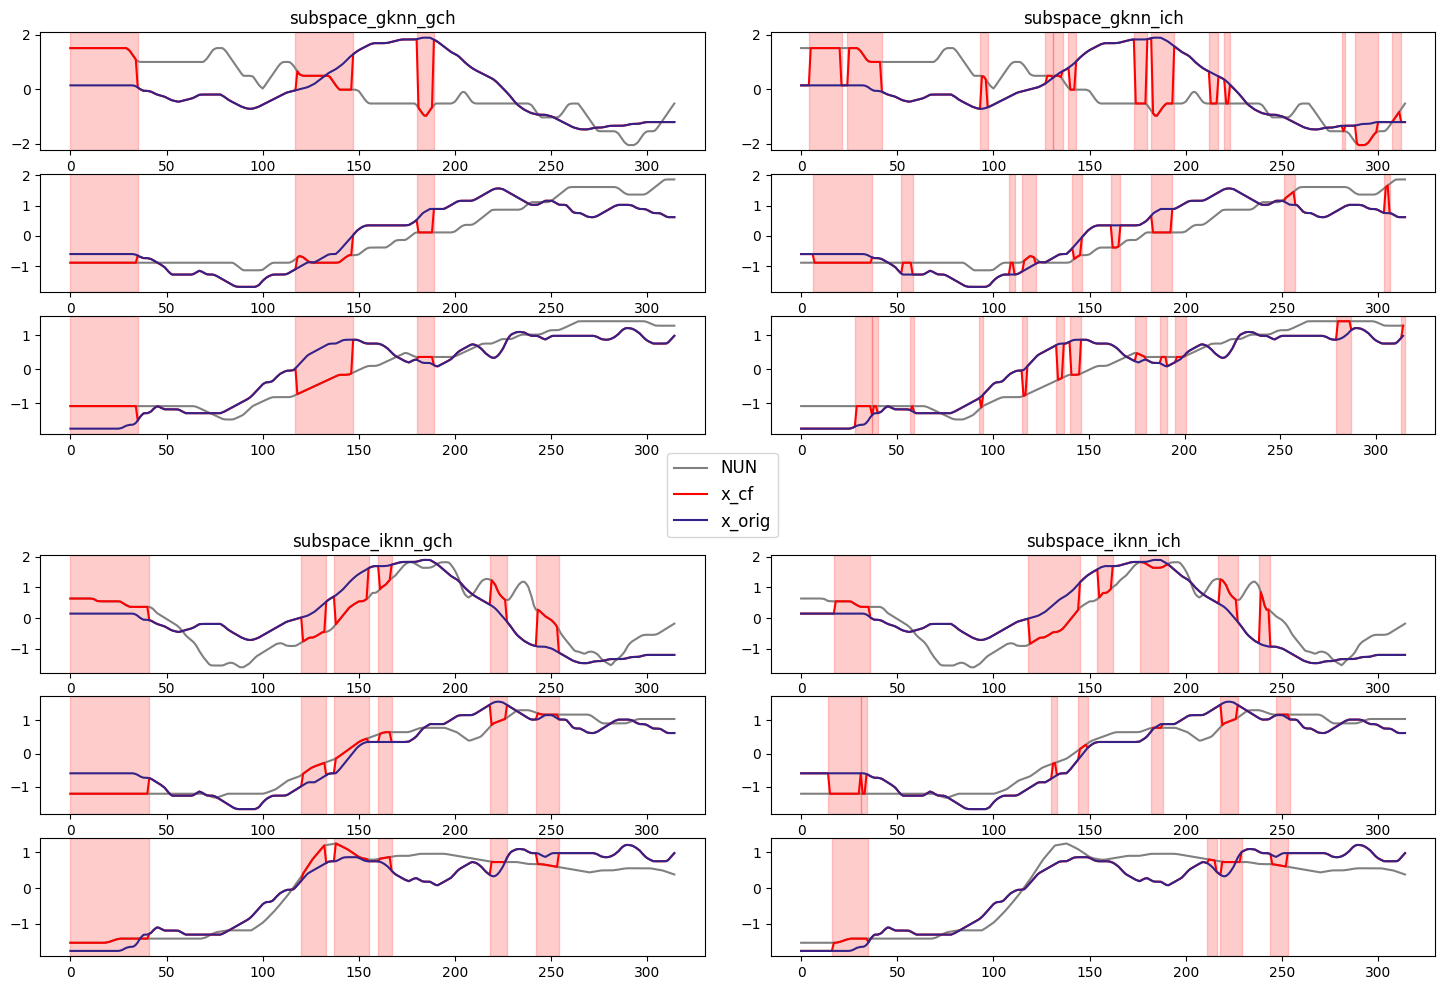

In [10]:
X_train, y_train, X_test, y_test = data_dict[dataset]
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance] for type in ["gknn", "iknn"]}
original_classes = original_classes_dict[dataset]
desired_classes = desired_classes_dict[dataset]
sol_cfs_methods = methods_cfs_dict[dataset]
sol_cfs_methods = {method: sol_cfs[instance]['cf'] for method, sol_cfs in sol_cfs_methods.items() if method in methods}

print(f'Sample {instance}: true class {y_test[instance]}, x_orig predicted {original_classes[instance]}, desired_class  {desired_classes[instance]}')
plot_comp_cfs(X_test[instance], possible_nuns_instance, sol_cfs_methods)


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
